# **STANDARD NOTEBOOK TO GET RESULTS**

## 1. Clean the Data

In [1]:
import pandas as pd 
import numpy as np 
# Jerome path : r'C:\Users\33640\OneDrive\Documents\GitHub\Portfolio_clustering_project\Data\DataBase.csv'
# Nail path : '/Users/khelifanail/Documents/GitHub/Portfolio_clustering_project/Data/DataBase.csv'
df = pd.read_csv(r'/Users/khelifanail/Documents/GitHub/Portfolio_clustering_project/Data/DataBase.csv')

df.set_index('ticker', inplace=True)

df.columns = pd.to_datetime(df.columns.str[1:], format='%Y%m%d').strftime('%d/%m/%Y')

df_cleaned = df.fillna(0) # Utilisez la méthode fillna(0) pour remplacer les NaN par 0

df_cleaned = df_cleaned.transpose() ## WE WANT COLUMNS TO BE VECTOR OF RETURN FOR A GIVEN TICKER

In [2]:
naive_portfolio = df_cleaned.mul(1/len(df_cleaned.columns)).mean(axis=1)

# Calcul de la PnL cumulée
pnl_cumul = np.cumprod(1 + naive_portfolio) - 1

# Calcul du Sharpe Ratio
# Supposons un taux sans risque de 0%
risk_free_rate = 0.0
annualized_return = pnl_cumul[-1] * 252 / len(pnl_cumul)  # 252 jours de trading par an
annualized_volatility = naive_portfolio.std() * np.sqrt(252)
sharpe_ratio = (annualized_return - risk_free_rate) / annualized_volatility
sharpe_ratio

/var/folders/q2/wg5gyfhj2r9cd97zfmckktvw0000gn/T/ipykernel_8605/1436905231.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  annualized_return = pnl_cumul[-1] * 252 / len(pnl_cumul)  # 252 jours de trading par an


0.11212421195119217

In [3]:
pnl_cumul

03/01/2000   -0.000025
04/01/2000   -0.000041
05/01/2000   -0.000030
06/01/2000   -0.000019
07/01/2000    0.000003
                ...   
24/12/2020    0.000536
28/12/2020    0.000530
29/12/2020    0.000515
30/12/2020    0.000523
31/12/2020    0.000529
Length: 5279, dtype: float64

## 4. Get SP500 data for comparison

In [4]:
import process

start_date = '2000-01-06'
end_date = '2020-12-30'
year = '2001-2020'
clustering_method = 'naive'

sp500_PnL = process.get_sp500_PnL(start_date, end_date)
print(len(sp500_PnL))
print(len(pnl_cumul))

[*********************100%%**********************]  1 of 1 completed
5279
5279


/usr/local/lib/python3.11/site-packages/yfinance/utils.py:781: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/Users/khelifanail/Documents/GitHub/Portfolio_clustering_project/Code/process.py:732: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sp500_data['Daily PnL'] = (sp500_data['Close'] - sp500_data['Open']) / sp500_data['Open'][0] ## /100 because we initially invest 1 dollar in our portfolio?


## 5. Plot Portfolio Cumulative PnL vs SP500 Cumulative PnL

ConversionError: Failed to convert value(s) to axis units: array(['2000-01-06T00:00:00.000000000', '2000-01-07T00:00:00.000000000',
       '2000-01-10T00:00:00.000000000', ...,
       '2020-12-24T00:00:00.000000000', '2020-12-28T00:00:00.000000000',
       '2020-12-29T00:00:00.000000000'], dtype='datetime64[ns]')

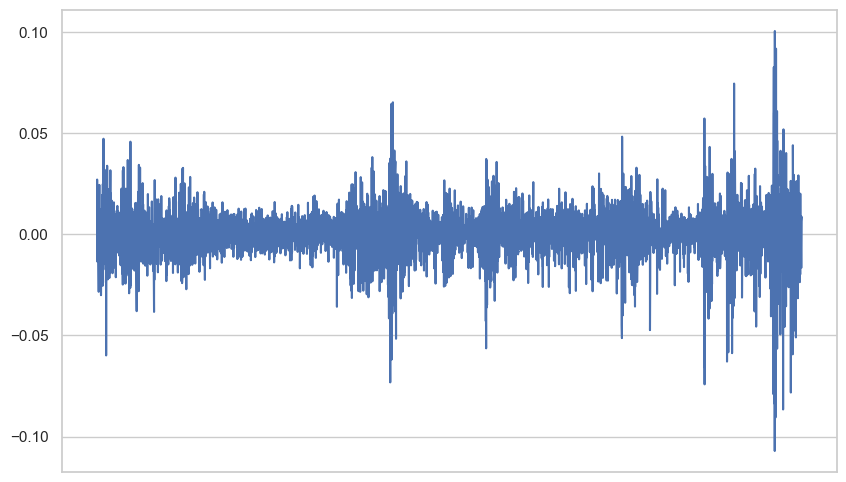

In [30]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Créer une figure
plt.figure(figsize=(10, 6))

# Tracer les données de sp500_PnL
plt.plot(sp500_PnL.index, sp500_PnL.values, label='S&P 500 PnL')

# Tracer les données de pnl_cumul
plt.plot(pnl_cumul.index, pnl_cumul.values, label='Cumulative PnL')

# Configurer les étiquettes
plt.xlabel('Date')
plt.ylabel('Valeur')
plt.title(f'Évolution de S&P 500 PnL et de Cumulative PnL ({year}) - Méthode de clustering : {clustering_method}')
plt.legend()

# Formater les dates sur l'axe des abscisses
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Afficher le graphique
plt.show()


/var/folders/q2/wg5gyfhj2r9cd97zfmckktvw0000gn/T/ipykernel_8605/1361861724.py:6: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(start='2000-01-01', end='2020-01-01', freq='Y')


ConversionError: Failed to convert value(s) to axis units: array(['2000-01-06T00:00:00.000000000', '2000-01-07T00:00:00.000000000',
       '2000-01-10T00:00:00.000000000', ...,
       '2020-12-24T00:00:00.000000000', '2020-12-28T00:00:00.000000000',
       '2020-12-29T00:00:00.000000000'], dtype='datetime64[ns]')

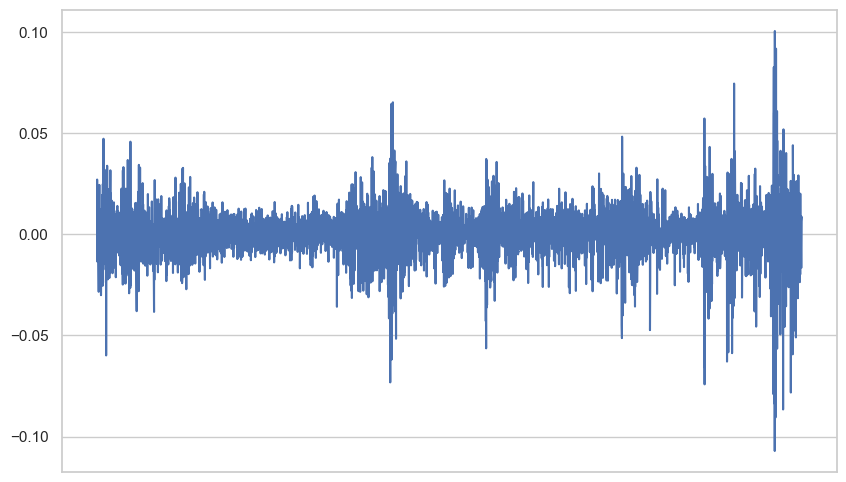

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Créer un index de dates annuelles
dates = pd.date_range(start='2000-01-01', end='2020-01-01', freq='Y')

# Créer deux séries de données avec le même index de dates
data1 = pd.Series(np.random.randn(len(dates)), index=dates)
data2 = pd.Series(np.random.randn(len(dates)), index=dates)

# Tracer les données
plt.figure(figsize=(10, 6))

# Tracer la première série de données
plt.plot(sp500_PnL.index, sp500_PnL.values, label='Série 1')

# Tracer la deuxième série de données
plt.plot(pnl_cumul.index, pnl_cumul.values, label='Série 2')

# Configurer les étiquettes
plt.xlabel('Année')
plt.ylabel('Valeur')
plt.title('Évolution des séries de données')
plt.legend()

# Afficher le graphique
plt.show()